In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'



The line of code plt.rcParams['image.cmap'] = 'gray' is used to configure the default colormap for images in Matplotlib, a popular plotting library in Python. Here's a detailed explanation:

- plt: This refers to the pyplot module in Matplotlib, which is typically imported as import matplotlib.pyplot as plt.

- rcParams: This is a configuration object within pyplot that allows you to customize the default settings of Matplotlib. The term "rc" stands for "runtime configuration."

- image.cmap: This specific configuration setting controls the default colormap used for displaying images. A colormap maps the scalar data in an image to colors.

- 'gray': This is the value being assigned to image.cmap, indicating that the default colormap for images should be grayscale. In a grayscale colormap, values are mapped to shades of gray, ranging from black to white.


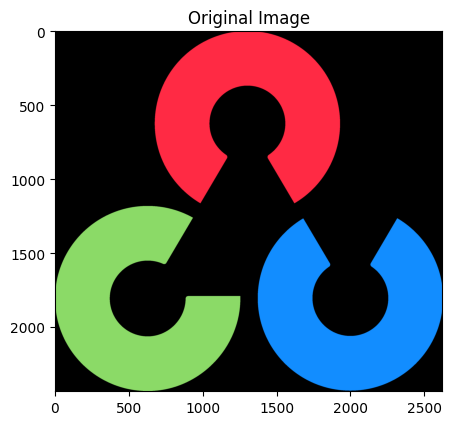

In [3]:
# Read the image in a 3 channel color format.
img = cv2.imread('../module03-histograms-and-color-segmentation/opencv_logo.png', cv2.IMREAD_COLOR)

# Display.
plt.figure(figsize = (5, 5))
plt.imshow(img[:, :, ::-1])  # Swap color channels from BGR to RGB
plt.title('Original Image');

In [8]:
# Convert the Image to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define Lower and Upper HSV Color Bounds
The HSV color space is cylindrical. In OpenCV, the Hue component is measure in degrees and has a range of [0, 180]. Saturation and Value both range from [0, 255]. The plot below shows a 2D representation of the color space. The Hue component is along the x-axis and the y-axis shows the Saturation component with a value of 255 being the most saturated. The entire plot is for a Value of 255 (the brightest value). You can imagine this plot as the outer layer of a cylinder (where the Value component is measured radially from the center of the cylinder). This is a very convenient color space to work with because the "color" is contained in a single component (H). The Saturation indicates how saturated the color is and the value indicates how bright or dark the color is.
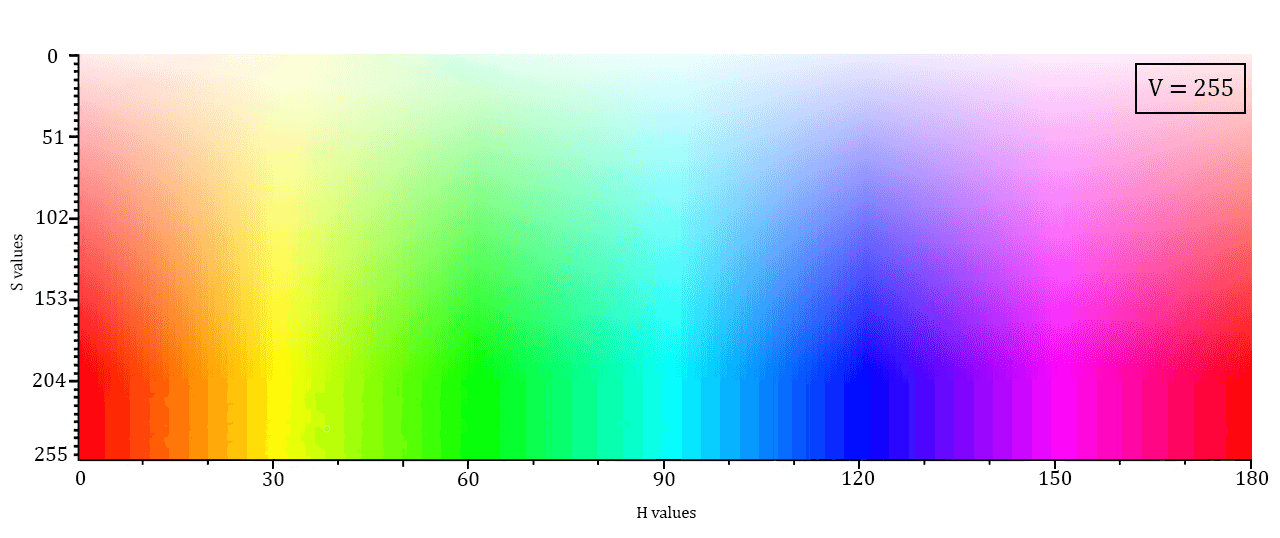

In [9]:
# Set range for red color.
r_lb = np.array([165, 50, 50], np.uint8)
r_ub = np.array([180, 255, 255], np.uint8)

# Set range for green color.
g_lb = np.array([35, 50, 50], np.uint8)
g_ub = np.array([80, 255, 255], np.uint8)

# Set range for blue color.
b_lb = np.array([95, 50, 50], np.uint8)
b_ub = np.array([125, 255, 255], np.uint8)

# Define a Color Mask for each Color

Function Syntax
dst = cv2.inRange(src, lowerb, upperb[, dst])
dst: output array of the same size as src and CV_8U type

The function has 3 required arguments:

1. src: first input array
2. lowerb: inclusive lower boundary array or a scalar
3. upperb: inclusive upper boundary array or a scalar
### OpenCV Documentation

[inRange](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)




- cv2.inRange(src, lowerb, upperb): This function checks if elements of the src array lie between the elements of two other arrays, lowerb and upperb. If the element lies between the two boundaries, the corresponding element in the output array is set to 255, otherwise, it is set to 0.
- img_hsv: The input image in HSV color space.
- r_lb, r_ub: The lower and upper bounds for the red color mask in HSV space.
- g_lb, g_ub: The lower and upper bounds for the green color mask in HSV space.
- b_lb, b_ub: The lower and upper bounds for the blue color mask in HSV space.
- r_mask, g_mask, b_mask: The resulting binary masks for red, green, and blue colors, respectively.

- plt.figure(figsize=(18, 4)): Creates a new figure with a specified size (18 inches wide and 4 inches tall).
- plt.subplot(131): Creates a subplot in a 1x3 grid and sets the current subplot to the first one (position 1 of 3).
- plt.imshow(r_mask): Displays the red mask in the first subplot.
- plt.title('Red Mask'): Sets the title of the first subplot to 'Red Mask'.
- plt.subplot(132): Creates the second subplot in a 1x3 grid and sets it as the current subplot.
- plt.imshow(g_mask): Displays the green mask in the second subplot.
- plt.title('Green Mask'): Sets the title of the second subplot to 'Green Mask'.
- plt.subplot(133): Creates the third subplot in a 1x3 grid and sets it as the current subplot.
- plt.imshow(b_mask): Displays the blue mask in the third subplot.
- plt.title('Blue Mask'): Sets the title of the third subplot to 'Blue Mask'.

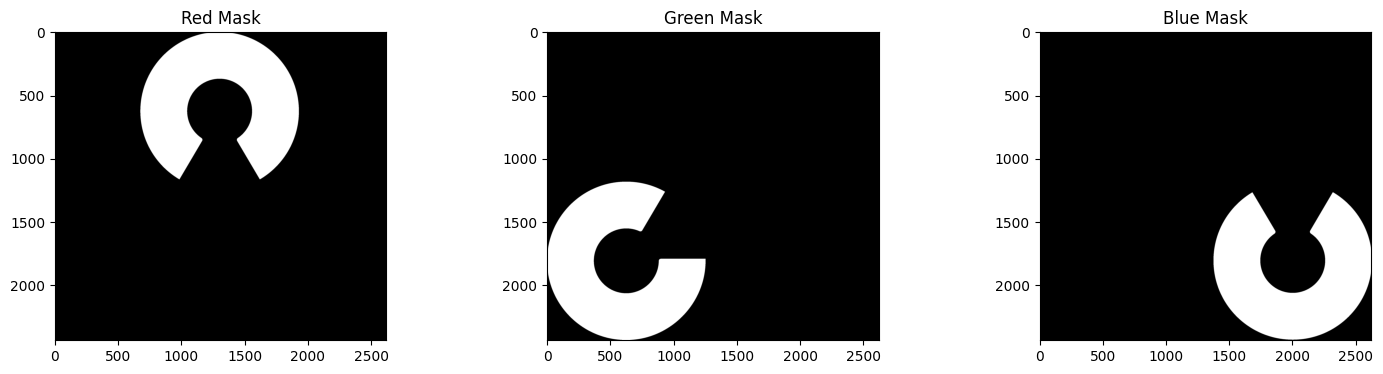

In [10]:
# Define each color mask.
r_mask = cv2.inRange(img_hsv, r_lb, r_ub)
g_mask = cv2.inRange(img_hsv, g_lb, g_ub)
b_mask = cv2.inRange(img_hsv, b_lb, b_ub)

# Display each color mask.
plt.figure(figsize = (18, 4))
plt.subplot(131); plt.imshow(r_mask); plt.title('Red Mask')
plt.subplot(132); plt.imshow(g_mask); plt.title('Green Mask')
plt.subplot(133); plt.imshow(b_mask); plt.title('Blue Mask');

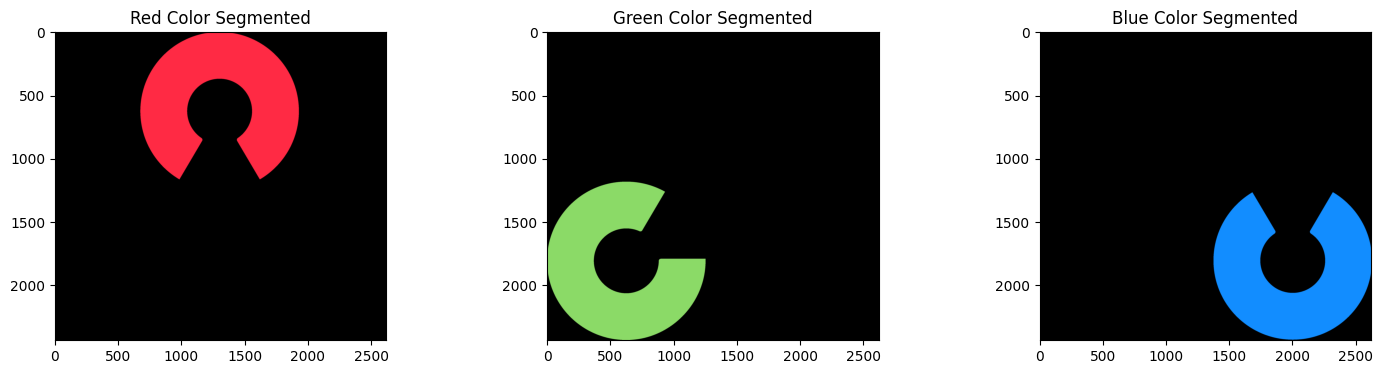

In [11]:
# Segment the colors.
r_seg = cv2.bitwise_and(img, img, mask = r_mask)
g_seg = cv2.bitwise_and(img, img, mask = g_mask)
b_seg = cv2.bitwise_and(img, img, mask = b_mask)

# Display the segmented colors.
plt.figure(figsize = (18, 4))
plt.subplot(131); plt.imshow(r_seg[:, :, ::-1]); plt.title('Red Color Segmented')
plt.subplot(132); plt.imshow(g_seg[:, :, ::-1]); plt.title('Green Color Segmented')
plt.subplot(133); plt.imshow(b_seg[:, :, ::-1]); plt.title('Blue Color Segmented');

1. cv2.bitwise_and: This function performs a bitwise AND operation on two arrays (in this case, the same image img), with an optional mask. The mask determines which pixels to keep based on the condition applied to the mask.
2. img: The input image, which is used twice in the function to perform the bitwise AND operation.
3. mask: A binary mask (either r_mask, g_mask, or b_mask) which defines which pixels belong to the red, green, or blue segments, respectively.

- plt.figure(figsize = (18, 4)): This initializes a new figure for displaying the images, with a specified size of 18 inches wide and 4 inches tall.
- plt.subplot(131): This creates a subplot in a 1x3 grid (one row, three columns) and selects the first subplot for displaying the red segmented image.
- plt.imshow(r_seg[:, :, ::-1]): This displays the red segmented image. The [:, :, ::-1] part reverses the color channels from BGR (OpenCV default) to RGB (Matplotlib default).

# 6. Exercise

Text(0.5, 1.0, 'Segmented Lakes')

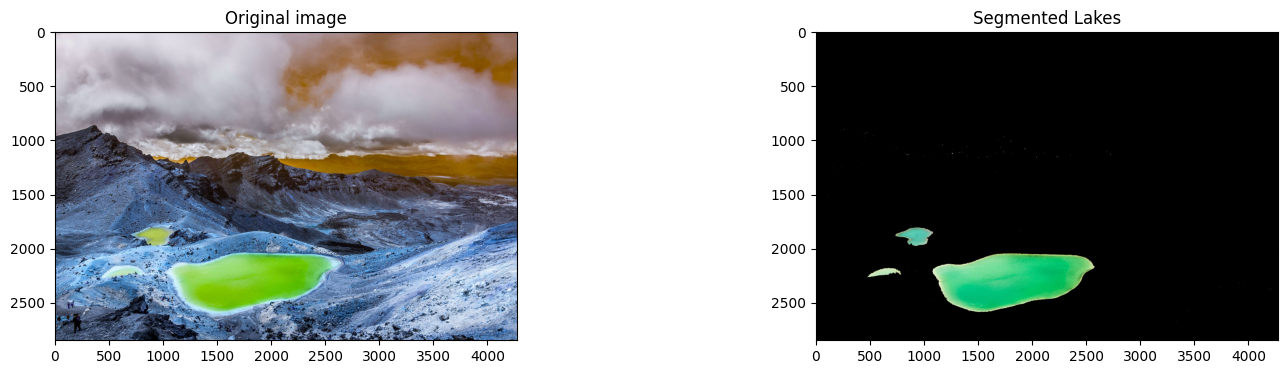

In [20]:
# Readin the color image: 'Emerald_Lakes_New_Zealand.jpg'
# Read the image in a 3 channel color format.
img = cv2.imread('../module03-histograms-and-color-segmentation/Emerald_Lakes_New_Zealand.jpg', cv2.IMREAD_COLOR)
# Convert to HSV (use: cvtColor())
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Specify the lower and upper bound to segment the green lakes in the image.
# Set range for green color.
g_lb = np.array([33, 5, 25], np.uint8)
g_ub = np.array([85, 255, 255], np.uint8)

# Create a green mask (use: inRange())
g_mask = cv2.inRange(img_hsv, g_lb, g_ub)

# Segment the lakes (use bitwise_and())
g_seg = cv2.bitwise_and(img, img, mask = g_mask)

# Display the original image and the segmented lakes.
# Display the segmented colors.
plt.figure(figsize = (18, 4))
plt.subplot(121); plt.imshow(img); plt.title('Original image')
plt.subplot(122); plt.imshow(g_seg[:, :, ::-1]); plt.title('Segmented Lakes')

# Compare calcHist() with plt.hist()
## Function Syntax
hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
This function has 5 required arguments:

images: Source arrays. They all should have the same depth, CV_8U, CV_16U or CV_32F , and the same size. Each of them can have an arbitrary number of channels.

channels: List of the dims channels used to compute the histogram. The first array channels are numerated from 0 to images[0].channels()-1 , the second array channels are counted from images[0].channels() to images[0].channels() + images[1].channels()-1, and so on.

mask: Optional mask. If the matrix is not empty, it must be an 8-bit array of the same size as images[i] . The non-zero mask elements mark the array elements counted in the histogram.

histSize: Array of histogram sizes in each dimension.

ranges: Array of the dims arrays of the histogram bin boundaries in each dimension. ### OpenCV Documentation

[CalcHist()](https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)


Text(0.5, 1.0, 'np.ravel(), plt.hist()')

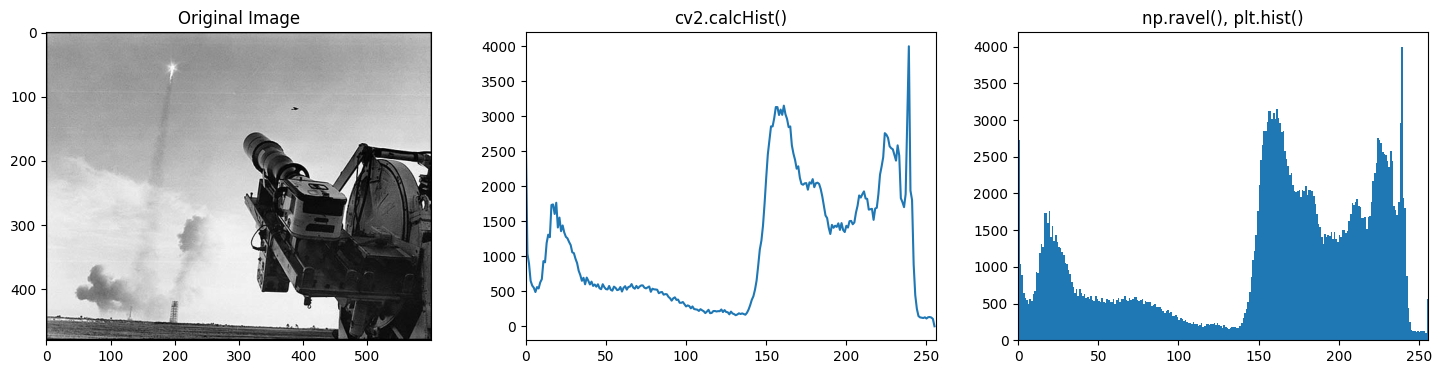

In [6]:
# Read the image.
img = cv2.imread('../module03-histograms-and-color-segmentation/Apollo-8-Launch.jpg', 0)

# Use calcHist() in OpenCV.
hist = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0,255])

# Flatten the image data.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize = [18, 4])
plt.subplot(131); plt.imshow(img); plt.title('Original Image')
plt.subplot(132); plt.plot(hist); plt.xlim([0, 256]); plt.title('cv2.calcHist()')
plt.subplot(133); plt.hist(img_flatten,256,[0,256]); plt.xlim([0, 256]); plt.title('np.ravel(), plt.hist()')

# Different images with identical histograms

Text(0.5, 1.0, 'Histogram of noisy image')

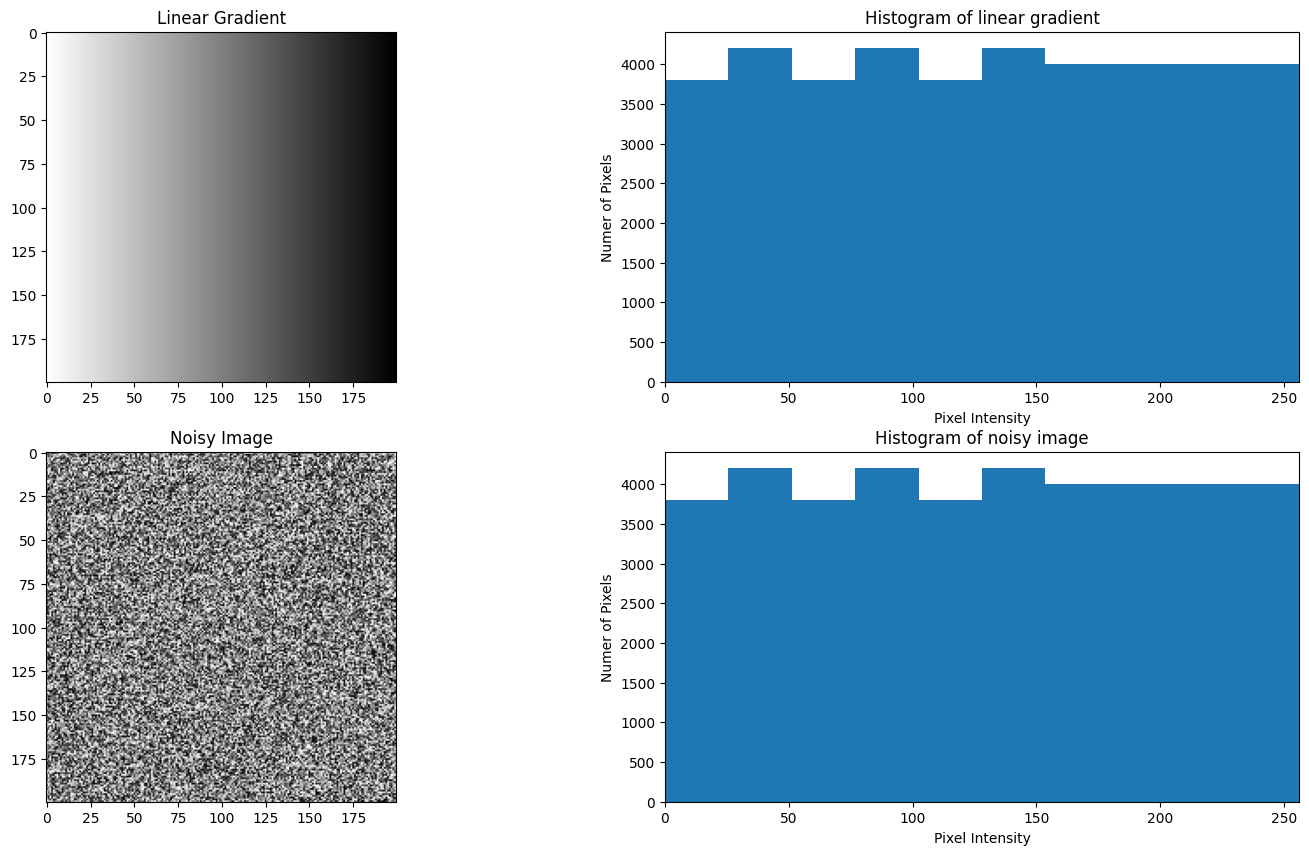

In [8]:
# Load in the two gradient images.
img_gradient = cv2.imread('../module03-histograms-and-color-segmentation/linear_graident.png', cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread('../module03-histograms-and-color-segmentation/noisy.png', cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D arrays.
gradient_flatten = img_gradient.ravel()
noisy_flatten = img_noisy.ravel()

# Display the images and histograms.
plt.figure(figsize = [18, 10])

plt.subplot(221); plt.imshow(img_gradient); plt.title('Linear Gradient')

plt.subplot(222) 
plt.hist(gradient_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('Histogram of linear gradient');

plt.subplot(223); plt.imshow(img_noisy); plt.title('Noisy Image')

plt.subplot(224) 
plt.hist(noisy_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('Histogram of noisy image')

# Explanation
It is important to understand what histograms can and cannot tell us. In two very different images actually have identical histograms, with an approximately even distrubution of pixels in each bin. Just because two images have identical histograms, it does not mean they are otherwise the same.

# Color Histograms

(0.0, 200000.0)

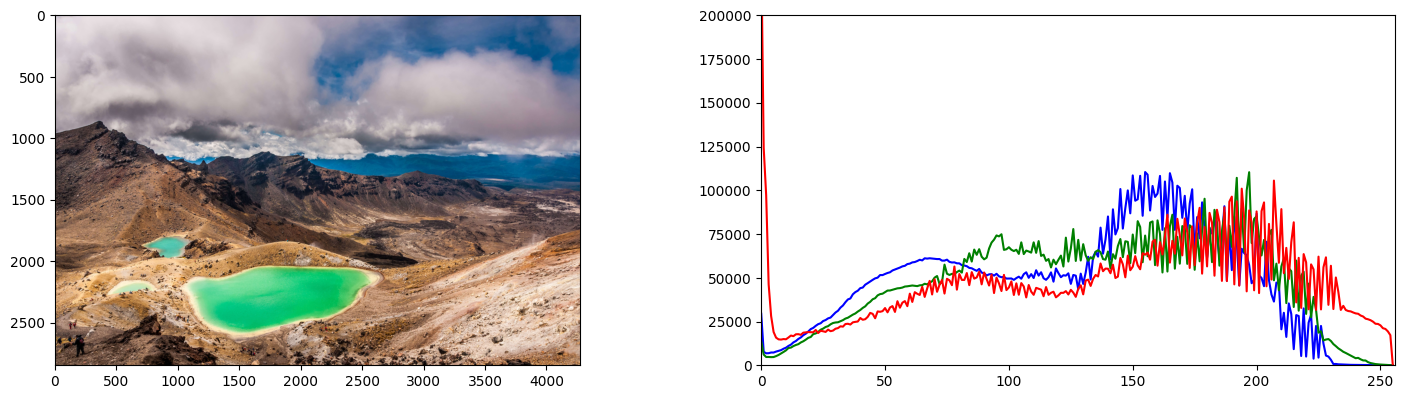

In [10]:
# Read the color images.
img = cv2.imread('../module03-histograms-and-color-segmentation/Emerald_Lakes_New_Zealand.jpg')

# Compute histograms for each color channel for both images.
hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])
hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])
hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])

# Display the images and histogram plots.
plt.figure(figsize = [18, 10])
plt.subplot(221); plt.imshow(img[:, :, ::-1])

plt.subplot(222) 
plt.plot(hist1, 'b'); plt.plot(hist2, 'g'); plt.plot(hist3, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 200000])

# Using a mask with calcHist()

(0.0, 10000.0)

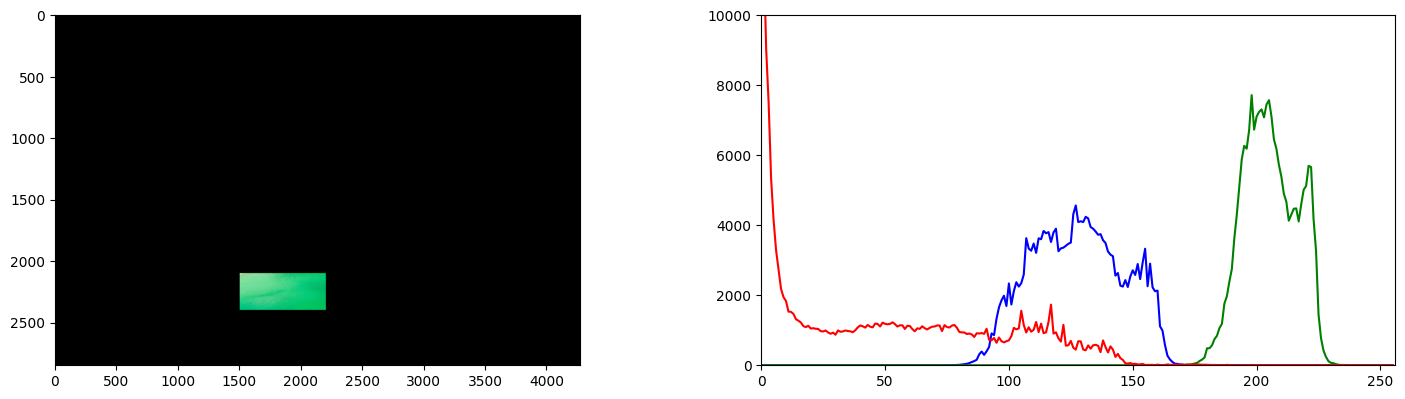

In [12]:
# Read the color images.
img = cv2.imread('../module03-histograms-and-color-segmentation/Emerald_Lakes_New_Zealand.jpg')

# Create a mask to filter the image for the histogram calculation.
mask_hist = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')

# Select a region that isolates the green lake.
mask_hist[2100:2400, 1500:2200] =  255

# Create a similar mask to show the selected region in the image (for display purposes only).
# The mask must have the same number of color channels as the image, but each color channel will
# contain the same information.
mat = [mask_hist, mask_hist, mask_hist]
mask_3ch = cv2.merge(mat, 3)

# Create an image that only shows the selected region of interest.
img_roi = cv2.bitwise_and(img, mask_3ch)

# Compute histograms for each color channel for both images.
hist1_lake = cv2.calcHist([img], [0], mask_hist, [256], [0, 255])
hist2_lake = cv2.calcHist([img], [1], mask_hist, [256], [0, 255])
hist3_lake = cv2.calcHist([img], [2], mask_hist, [256], [0, 255])

# Display the images and histogram plots.
plt.figure(figsize = [18, 10])
plt.subplot(223); plt.imshow(img_roi[:, :, ::-1])
plt.subplot(224); plt.plot(hist1_lake, 'b'); plt.plot(hist2_lake, 'g'); plt.plot(hist3_lake, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 10000])

# Histogram Equalization
An image histogram is a graphical representation of the tonal distribution of data. Each histogram is simply an array with 256 bins, and each bins contains the number of pixels with that intensity. Histogram Equalization is a non-linear method for enhancing contrast in an image. Let's see how to perform histogram equalization in OpenCV using [equalizeHist()](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e).

# Histogram Equalization for Grayscale Images
The function equalizeHist() performs histogram equalization on a grayscale image. The syntax is given below.

Function Syntax
dst = cv2.equalizeHist(src[, dst])
Parameters

src: Source 8-bit single channel image.
dst: Destination image of the same size and type as src.
OpenCV Documentation
equalizeHist()

Text(0.5, 1.0, 'Original Image')

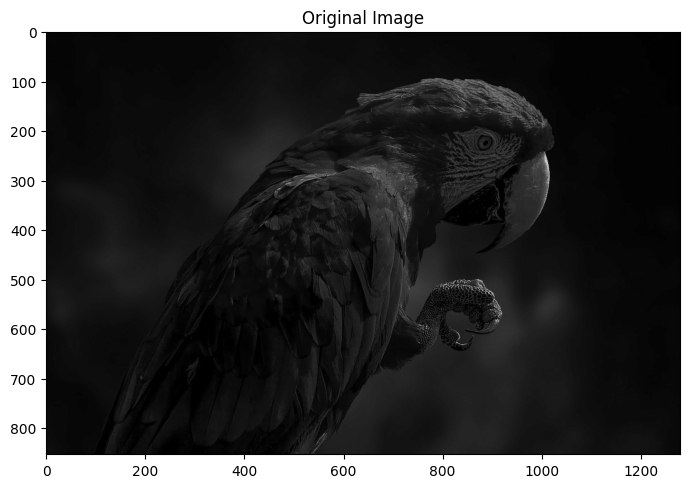

In [14]:
# Read the image in grayscale format.
img = cv2.imread('../module03-histograms-and-color-segmentation/parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img); plt.title('Original Image')

Text(0.5, 1.0, 'Equalized Histogram')

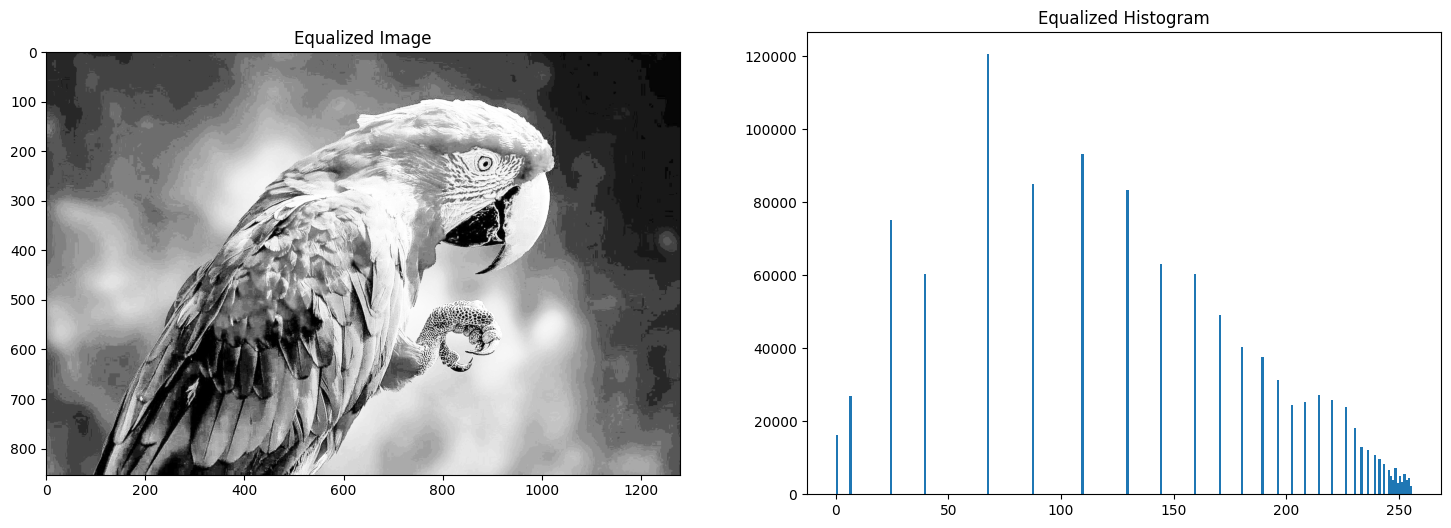

In [16]:
# Read the image in grayscale format.
img = cv2.imread('../module03-histograms-and-color-segmentation/parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Equalize histogram
img_eq = cv2.equalizeHist(img)

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img_eq); plt.title('Equalized Image')
plt.subplot(122); plt.hist(img_eq.ravel(), 256, [0, 256]); plt.title('Equalized Histogram')

# Histogram Equalization for Color Images
For color images, we can not simply apply histogram equalization on the R, G, B channels separately. To understand why it is not a very good idea, let's take a look at an example

# Wrong way

Text(0.5, 1.0, 'Equalized Image')

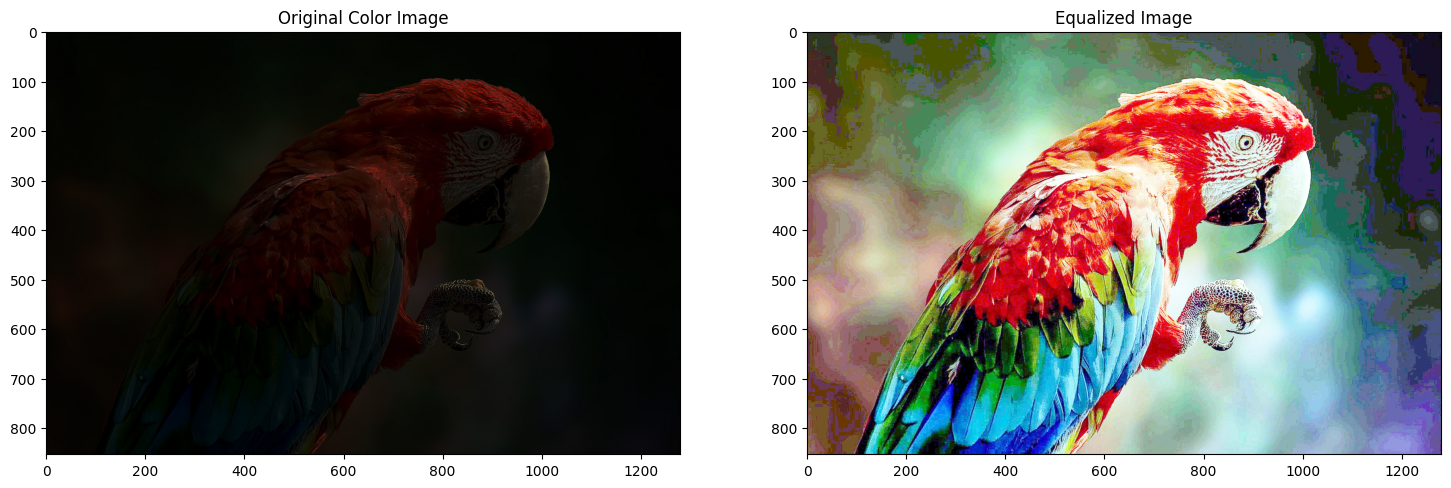

In [19]:
# Read color image
img = cv2.imread('../module03-histograms-and-color-segmentation/parrot.jpg')
img_eq = np.zeros_like(img)

# Peform histogram equalization on each channel separately.
for i in range(0, 3):
    img_eq[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Original Color Image')
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title('Equalized Image')

# Right way
We just saw that histogram equalization performed on the three channels separately leads to poor results. The reason is that when each color channel is non-linearly transformed independently, you can get completely new and unrelated colors.

The right way to perform histogram equalization on color images is to transform the images to a space like the HSV colorspace where colors/hue/tint is separated from the intensity.

WORKFLOW

- Tranform the image to HSV colorspace.
- Perform histogram equalization only on the V channel.
- Transform the image back to RGB colorspace.

Text(0.5, 1.0, 'Equalized Image')

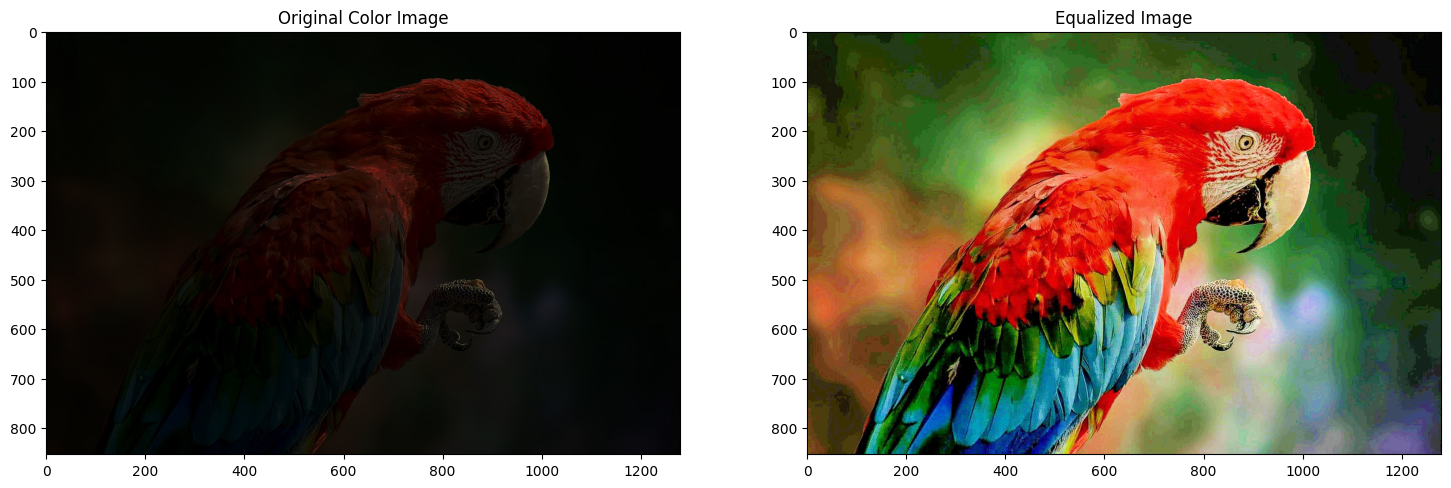

In [20]:
# Read the color image.
img = cv2.imread('../module03-histograms-and-color-segmentation/parrot.jpg', cv2.IMREAD_COLOR)

# Convert to HSV.
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Perform histogram equalization only on the V channel, for value intensity.
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:, :, 2])

# Convert back to BGR format.
img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Original Color Image')
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title('Equalized Image')

Text(0.5, 1.0, 'Histogram Equalized')

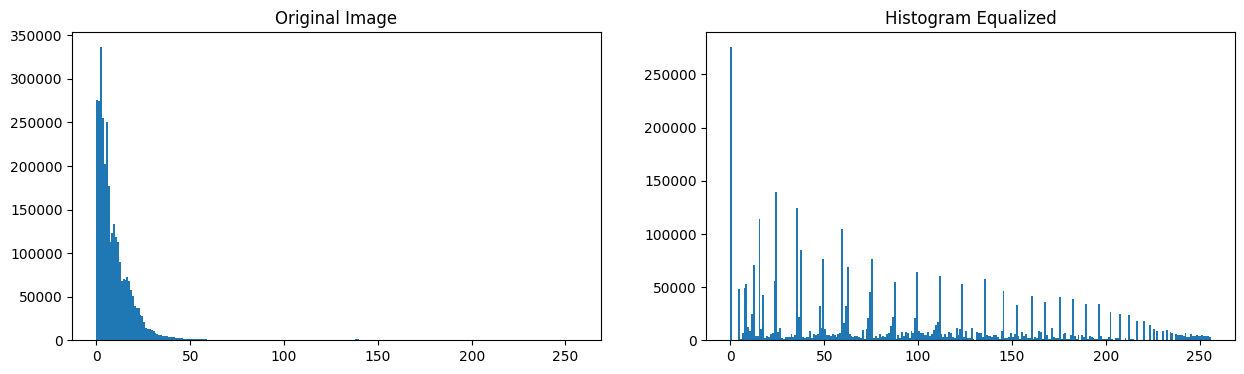

In [21]:
# Display the histograms.
plt.figure(figsize = [15,4])
plt.subplot(121); plt.hist(img.ravel(),256,[0,256]); plt.title('Original Image')
plt.subplot(122); plt.hist(img_eq.ravel(),256,[0,256]); plt.title('Histogram Equalized')